<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/succes_sensor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hmyrcmn/KUL.git

Cloning into 'KUL'...
remote: Enumerating objects: 104617, done.
remote: Counting objects: 100% (34049/34049), done.
remote: Compressing objects: 100% (4256/4256), done.
remote: Total 104617 (delta 29803), reused 34035 (delta 29789), pack-reused 70568
Receiving objects: 100% (104617/104617), 172.25 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (100113/100113), done.
Updating files: 100% (36185/36185), done.


# data

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle  # Shuffle'ı içe aktar



# Veri yükleme
true_folder ='/content/KUL/BigData/newData/trueVal'
X_data = []

Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/BigData/newData/falseVal'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(0)




X_data = np.array(X_data)
Y_labels = np.array(Y_labels)

# X_data ve Y_labels dizilerini karıştırın
X_data, Y_labels = shuffle(X_data, Y_labels)


print("x_data shape: ",X_data.shape)
print("x_data 5: ",X_data[:1])
print("Y_labels 5: ",Y_labels[:1])



x_data shape:  (4000, 1000, 1)
x_data 5:  [[[151.52856811]
  [155.20917821]
  [151.11666291]
  [151.517661  ]
  [152.84855208]
  [152.30281685]
  [152.68705755]
  [153.06579538]
  [155.38386965]
  [153.80692835]
  [152.49290488]
  [154.5265475 ]
  [154.87839307]
  [158.25438413]
  [155.39129872]
  [154.47569539]
  [154.52907436]
  [154.23364499]
  [154.89332747]
  [155.11914653]
  [162.19146767]
  [155.6435489 ]
  [158.11471864]
  [159.14785496]
  [160.07256484]
  [158.98936205]
  [163.22301393]
  [159.5488138 ]
  [160.4830999 ]
  [158.52363576]
  [160.68988119]
  [160.61246494]
  [160.86710872]
  [161.11732784]
  [166.30490801]
  [161.65328902]
  [161.84185189]
  [161.50101038]
  [162.30350488]
  [162.52804686]
  [162.74845447]
  [163.12898764]
  [166.51671503]
  [164.83543511]
  [160.36463781]
  [162.65804416]
  [166.4175531 ]
  [164.17902845]
  [164.3678539 ]
  [160.77707177]
  [164.7342628 ]
  [164.91192918]
  [165.08595881]
  [165.25639316]
  [165.4232737 ]
  [165.58664189]
  [164

In [3]:
# Verileri düzenleme ve normalleştirme
print("x_data shape: ",X_data.shape)

num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data.reshape(num_samples, sequence_length * num_features)#4000,1000 *1

# Eğitim ve test setlerine bölme


X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

print("X_train.shape:",X_train.shape)
print("y_train:",y_train.shape)


x_data shape:  (4000, 1000, 1)
X_train.shape: (3200, 1000)
y_train: (3200,)


# model

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Modeli oluştur
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(1000, 1)),
    # MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    # MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Modeli değerlendir
loss, accuracy = model.evaluate(X_train, y_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/10
200/200 [==============================] - 6s 11ms/step - loss: 11.6614 - accuracy: 0.5081
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6932 - accuracy: 0.4894
Epoch 4/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4825
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 7/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4925
Epoch 8/10
200/200 [==============================] - 2s 11ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 9/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 10/10
100/100 [==============================] - 1s 5ms/step - loss: 0.6931 - accura

# test

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/newData/test/tt'
X_data_test = []

Y_labels_test = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(1)

false_folder = '/content/KUL/BigData/newData/test/ff'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(0)




X_data_test = np.array(X_data_test)
Y_labels_test = np.array(Y_labels_test)

# X_data ve Y_labels dizilerini karıştırın
X_data_test, Y_labels_test = shuffle(X_data_test, Y_labels_test)


print("x_data shape: ",X_data_test.shape)
# print("x_data 5: ",X_data_test[:1])
print("Y_labels 5: ",Y_labels_test.shape)


fatal: destination path 'KUL' already exists and is not an empty directory.
x_data shape:  (30, 1000, 1)
Y_labels 5:  (30,)


1/1 [==============================] - 0s 437ms/step
Y_labels 5:  [1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0]
Tahminlerin Sınıfları: [1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0]
Konfüzyon Matrisi:
[[15  0]
 [ 0 15]]


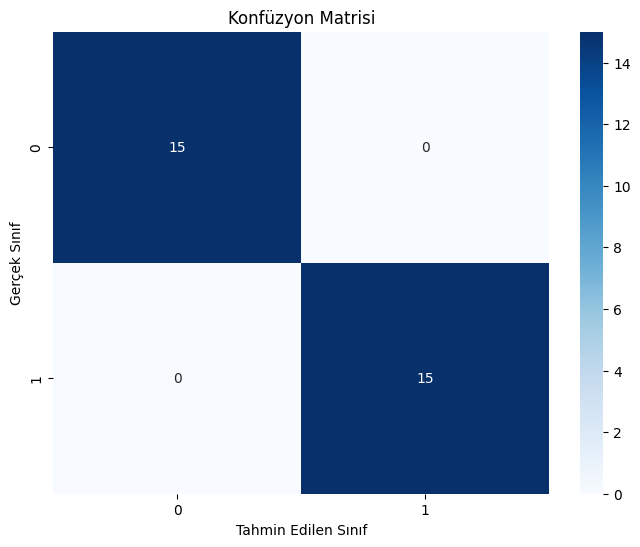

In [13]:
# Modeli tahmin et
predictions = model.predict(X_data_test)

# Tahminleri yazdır
# print("Tahminler:", predictions)
print("Y_labels 5: ",Y_labels_test)
threshold = 0.5
predictions_classes = (predictions > threshold).astype(int)

print("Tahminlerin Sınıfları:", predictions_classes.flatten())
from sklearn.metrics import confusion_matrix

# Gerçek sınıflar ile tahmin edilen sınıflar arasındaki karşılaştırma
conf_matrix = confusion_matrix(Y_labels_test, predictions_classes)

print("Konfüzyon Matrisi:")
print(conf_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Konfüzyon matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Konfüzyon Matrisi')
plt.show()


#test 2

fatal: destination path 'KUL' already exists and is not an empty directory.
x_data shape:  (20, 1000, 1)
Y_labels 5:  (20,)
1/1 [==============================] - 0s 329ms/step
Y_labels 5:  [1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1]
Tahminlerin Sınıfları: [1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1]
Konfüzyon Matrisi:
[[10  0]
 [ 0 10]]


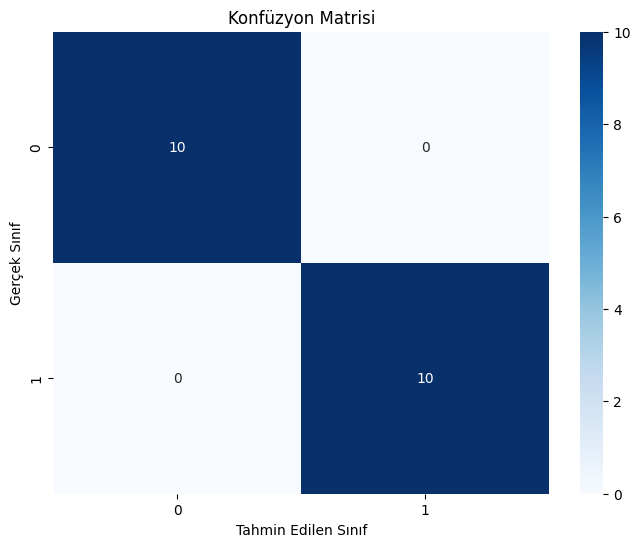

In [14]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/newData/trues'
X_data_test = []

Y_labels_test = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(1)

false_folder = '/content/KUL/BigData/newData/falses'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(0)




X_data_test = np.array(X_data_test)
Y_labels_test = np.array(Y_labels_test)

# X_data ve Y_labels dizilerini karıştırın
X_data_test, Y_labels_test = shuffle(X_data_test, Y_labels_test)


print("x_data shape: ",X_data_test.shape)
# print("x_data 5: ",X_data_test[:1])
print("Y_labels 5: ",Y_labels_test.shape)


# Modeli tahmin et
predictions = model.predict(X_data_test)

# Tahminleri yazdır
# print("Tahminler:", predictions)
print("Y_labels 5: ",Y_labels_test)
threshold = 0.5
predictions_classes = (predictions > threshold).astype(int)

print("Tahminlerin Sınıfları:", predictions_classes.flatten())

from sklearn.metrics import confusion_matrix

# Gerçek sınıflar ile tahmin edilen sınıflar arasındaki karşılaştırma
conf_matrix = confusion_matrix(Y_labels_test, predictions_classes)

print("Konfüzyon Matrisi:")
print(conf_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Konfüzyon matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Konfüzyon Matrisi')
plt.show()




# tensorboarrd

In [6]:
!pip install tensorboard